# Introduction

In [34]:
rename_dict = {
    'default payment next month': 'default.payment.next.month'
}

data_df.rename(columns=rename_dict, inplace=True)
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [35]:
print(data_df['default.payment.next.month'].value_counts())
print(data_df['EDUCATION'].value_counts())
print(data_df['MARRIAGE'].value_counts())

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


5. Let's check if there is any missing data.

In [36]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT1,LIMIT_BAL,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default.payment.next.month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

6. Check data unbalance with respect with *target* value. (default.payment.next.month).

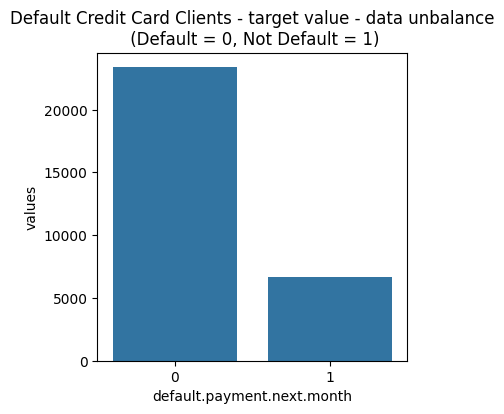

In [37]:
temp = data_df["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (4,4))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

A number of **6,636** out of **30,000** (or **22%**) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

# Data exploration

Amount of credit limit:

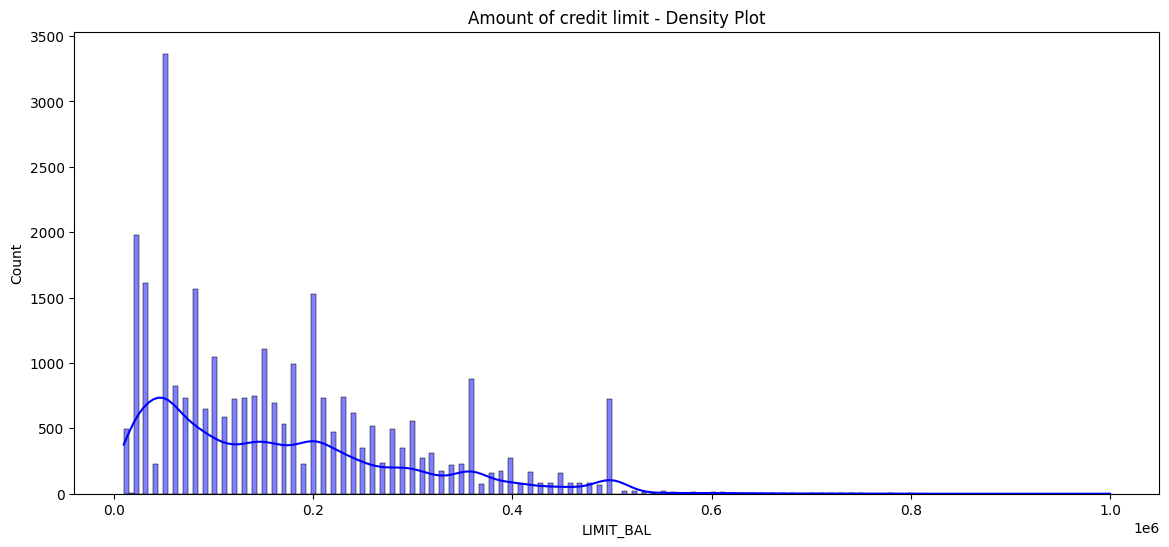

In [38]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.histplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.

In [39]:
print(data_df['LIMIT_BAL'].value_counts().shape)
print(data_df['LIMIT_BAL'].value_counts().head(5))

(81,)
LIMIT_BAL
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: count, dtype: int64


There are 81 distinct values for amount of credit limit.
Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

## 1. Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

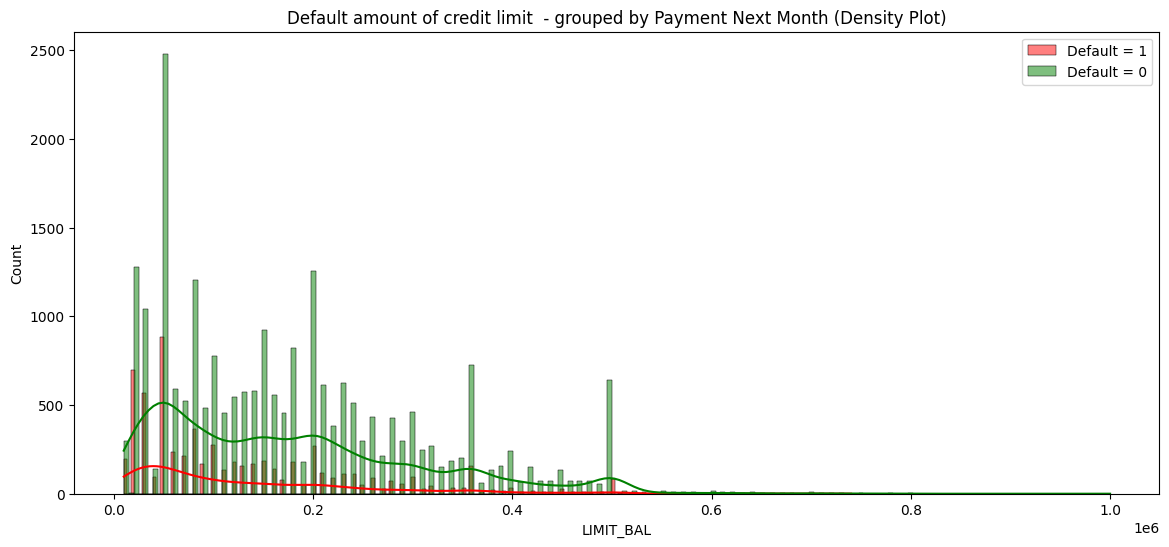

In [40]:
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.histplot(class_1,kde=True,bins=200, color="red", label="Default = 1")
sns.histplot(class_0,kde=True,bins=200, color="green", label="Default = 0")
plt.legend()
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of **50,000**, **20,000** and **30,000**.


## 2.Let's check the credit limit distribution vs. sex. For the sex, 1 stands for male and 2 for female.

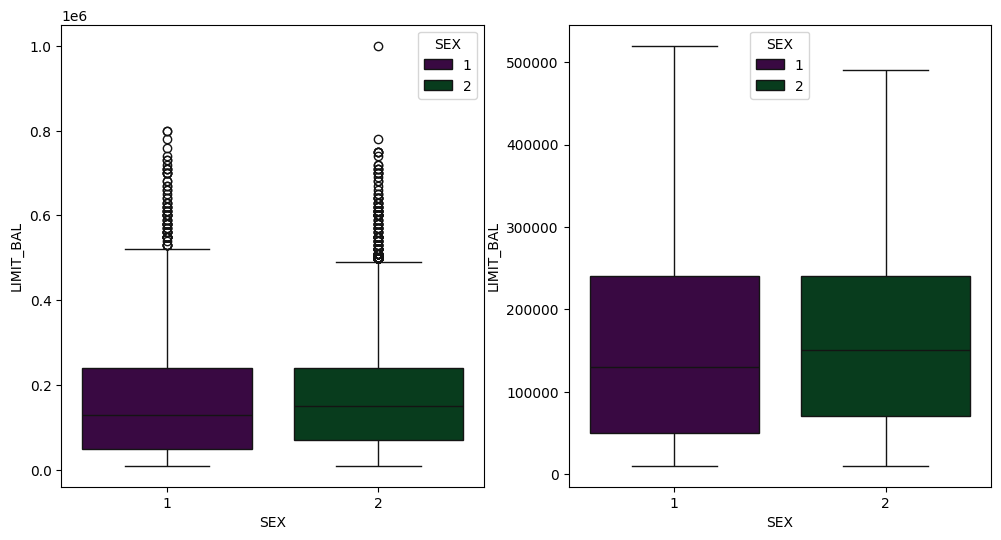

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=False)
plt.show();

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

## 3. Check the Features correlation


For the numeric values, let's represent the features correlation.


Let's check the correlation of Amount of bill statement in April - September 2005.

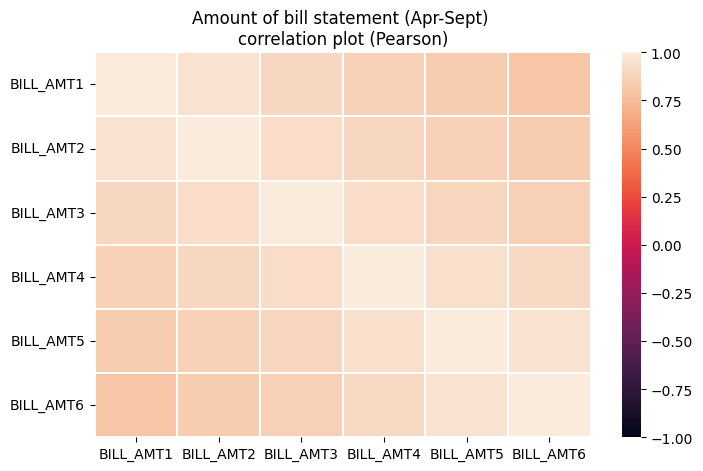

In [42]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,5))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.


Let's check the correlation of Amount of previous payment in April - September 2005.

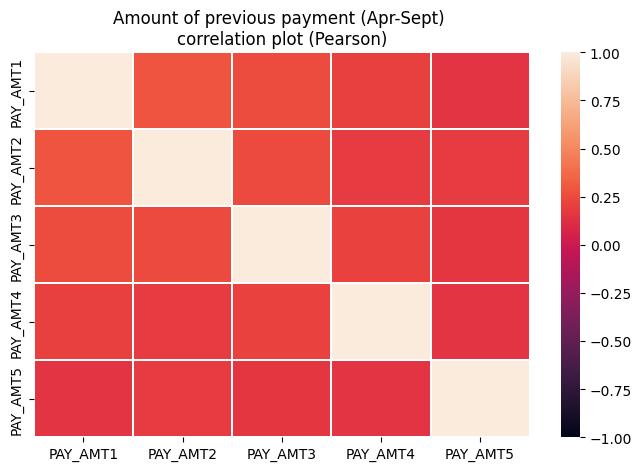

In [43]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,5))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.

Let's check the correlation between Repayment status in April - September 2005.

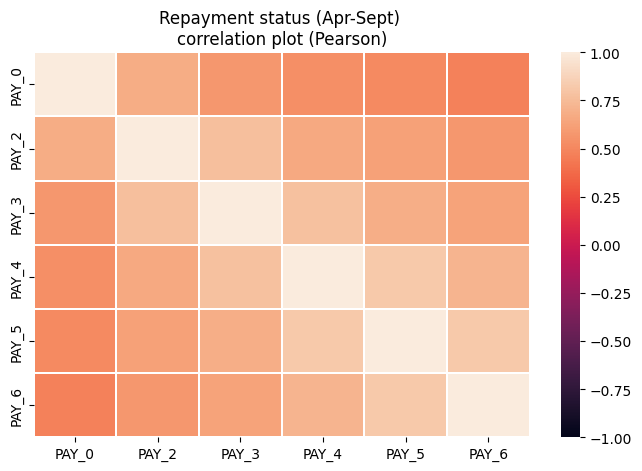

In [44]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,5))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.


## 4.Sex, Education, Age and Marriage


Let's show sex, education, age and marriage distributions.

We start by showing the boxplots with age distribution grouped by marriage status and sex.

Marriage status meaning is:

* 0 : unknown (let's consider as others as well)
* 1 : married
* 2 : single
* 3 : others

Sex meaning is:

* 1 : male
* 2 : female


In [45]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

C:\Users\taro\AppData\Local\Temp\ipykernel_19240\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


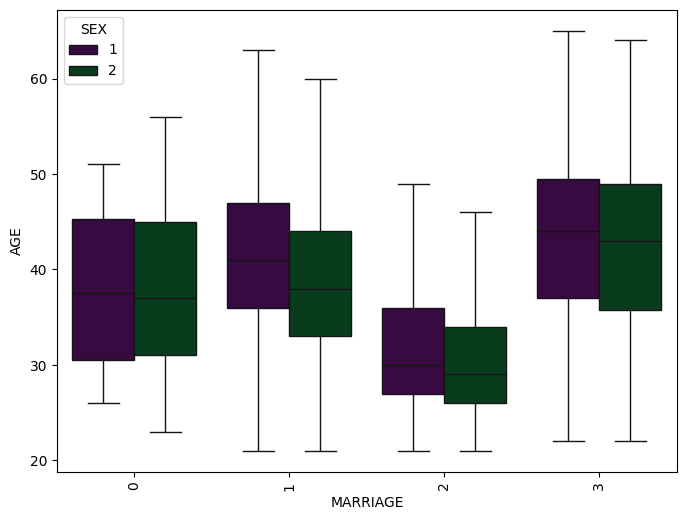

In [46]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.


Let's show the boxplots with age distribution grouped by education and marriage.

Education status meaning is:

* 1 : graduate school
* 2 : university
* 3 : high school
* 4 : others
* 5 : unknown
* 6 : unknow


C:\Users\taro\AppData\Local\Temp\ipykernel_19240\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


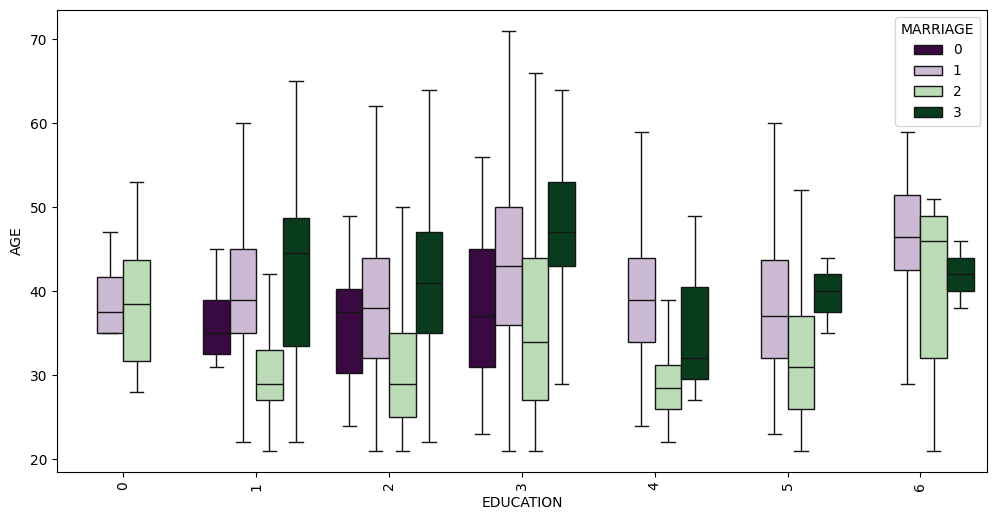

In [47]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

## Age, sex and credit amount limit


Let's show the  boxplots with credit amount limit distribution grouped by age and sex.



C:\Users\taro\AppData\Local\Temp\ipykernel_19240\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


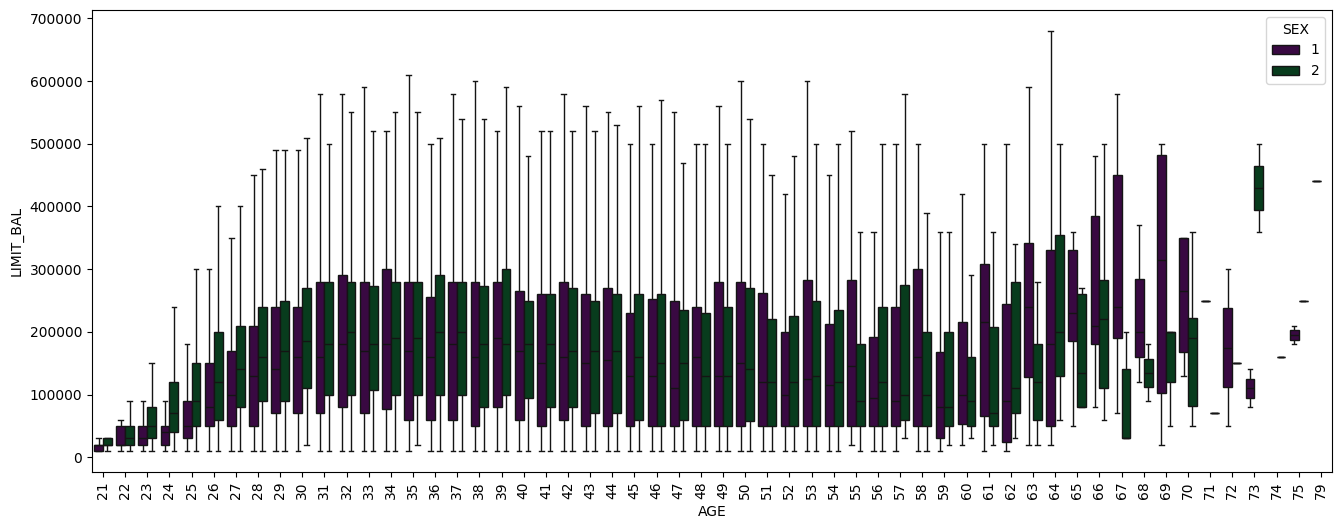

In [48]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Mean, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.

Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females.



## 5. Marriage status, education level and credit amount limit


Let's show the  boxplots with credit amount limit distribution grouped by marriage status and education level.

C:\Users\taro\AppData\Local\Temp\ipykernel_19240\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


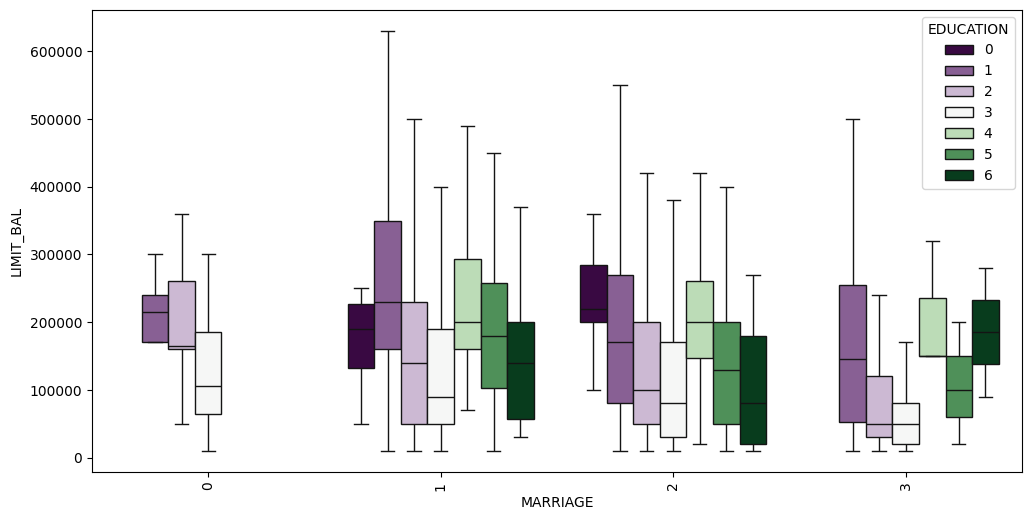

In [49]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)
#EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
#MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = divorce)


# Predictive Modles


## 1. Define predictors and target values

Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [50]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

## 2. Split data in train and validation set:

In [51]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

In [52]:
# data_df = pd.read_csv(r"D:\新建文件夹\Default-of-Credit-Card-Clients-Dataset-Analisys-main\tabnet_application\default_of_credit_card_clients.csv")
# in Colab the address is "/content/Credit-Default-Risk-Prediction/tabnet_application/default_of_credit_card_clients.csv"
train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [53]:
print("Total rows:", len(df))
print(train_df[target].value_counts())
print(val_df[target].value_counts())


Total rows: 2
default.payment.next.month
0    18656
1     5344
Name: count, dtype: int64
default.payment.next.month
0    4708
1    1292
Name: count, dtype: int64


In [54]:
# make copies of the train_df and val_df for later usage.
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

# Binary Decision Tree

Best parameters found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8186
The AUC sccore is:

0.6586986513963453


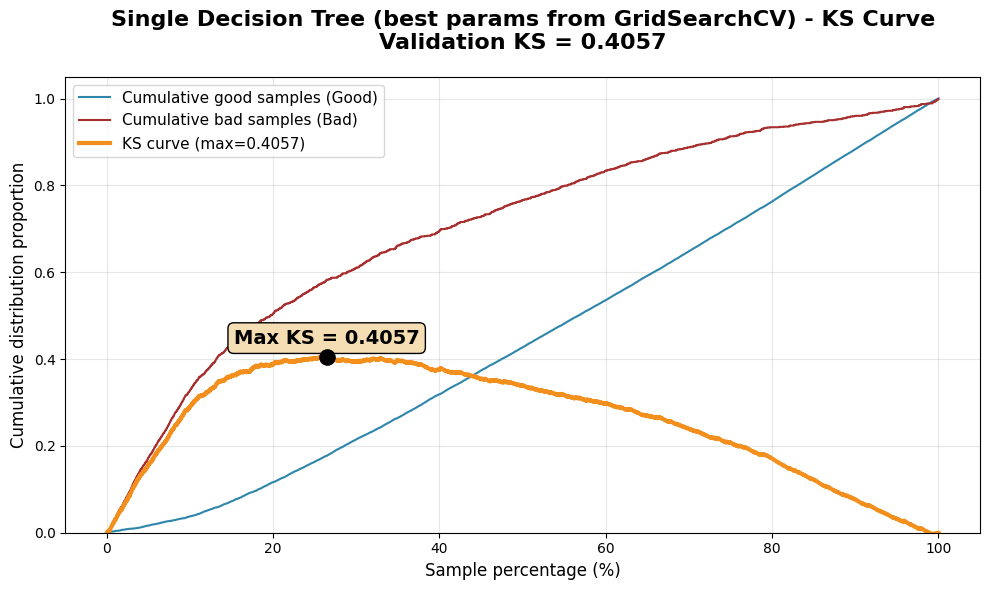

In [22]:
# this part is for decision tree only
#
#--------------------------------------------#
#
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

pd.set_option('display.max_columns', 100)

# ---------This version is used for colab--------------#
data_df = pd.read_csv(r"default_of_credit_card_clients.csv")
# data_df = pd.read_csv(r"D:\新建文件夹\Default-of-Credit-Card-Clients-Dataset-Analisys-main\tabnet_application\default_of_credit_card_clients.csv")

VALID_SIZE = 0.20 # simple validation using train_test_split
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018
EARLY_STOP = 100

IS_LOCAL = False

train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

target = 'default payment next month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 5, 6],
    'criterion': ['gini', 'entropy']
}

# # Adam_gradient
# adam = {
# }

# clf = DecisionTreeClassifier(
#     max_depth=6,
#     min_samples_split=20,
#     min_samples_leaf=5
# )


dtc = DecisionTreeClassifier(random_state=42)

# cv=5 means 5-fold cross-validation
clf = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')


clf.fit(train_df[predictors], train_df[target].values)

# 6. Print the best parameters and score
print(f"Best parameters found: {clf.best_params_}")
print(f"Best cross-validation accuracy: {clf.best_score_:.4f}")

best_model = clf.best_estimator_
clf_dt = best_model
# predictions = clf.predict(X_test)

preds = clf_dt.predict(val_df[predictors])

print('The AUC sccore is:\n')

print(roc_auc_score(val_df[target].values, preds))


# #-----------plot the Confusion Matrix------------#


# #  -------------------------------------------   #

# cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

# fig, (ax1) = plt.subplots(ncols=1, figsize=(5,4))
# sns.heatmap(cm,
#             xticklabels=['Not Default', 'Default'],
#             yticklabels=['Not Default', 'Default'],
#             annot=True,ax=ax1,
#             linewidths=.2,linecolor="Darkblue", cmap="Blues")
# plt.title('Confusion Matrix', fontsize=14)
# plt.show()


# val_prob = best_model.predict_proba(val_df[predictors])[:, 1]
# val_true = val_df[target].values


# Calculate KS value
# def compute_ks(y_true, y_prob):
#     bad = y_prob[y_true == 1]
#     good = y_prob[y_true == 0]
#     ks = ks_2samp(good, bad).statistic
#     return round(ks, 4)

# ks_value = compute_ks(val_true, val_prob)

# print(f"{' '*20} Risk Management Core Indicator")
# print(f"Validation dataset KS value (Kolmogorov-Smirnov) = {ks_value}")
# if ks_value >= 0.6:
#     print("→ Legendary model!")
# elif ks_value >= 0.4:
#     print("Excellent model!")
# print(f"{'='*65}\n")

# # Plot a standard banking-level KS curve
# def plot_ks(y_true, y_prob, model_name="Decision Tree"):
#     df = pd.DataFrame({"true": y_true, "prob": y_prob})
#     df = df.sort_values("prob", ascending=False).reset_index(drop=True)
#     df["good_cum"] = (df["true"] == 0).cumsum() / (df["true"] == 0).sum()
#     df["bad_cum"]  = (df["true"] == 1).cumsum() / (df["true"] == 1).sum()
#     df["ks"] = df["bad_cum"] - df["good_cum"]
    
#     max_ks = df["ks"].max()
#     max_idx = df["ks"].idxmax()
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(np.linspace(0, 100, len(df)), df["good_cum"], label="Cumulative good samples (Good)", color="#2E86AB")
#     plt.plot(np.linspace(0, 100, len(df)), df["bad_cum"],  label="Cumulative bad samples (Bad)",  color="#A82F2F")
#     plt.plot(np.linspace(0, 100, len(df)), df["ks"],       label=f"KS curve (max={max_ks:.4f})", color="#F28F1D", linewidth=3)
    
#     # Mark the maximum KS point
#     plt.scatter(max_idx/len(df)*100, max_ks, color="black", s=120, zorder=10)
#     plt.text(max_idx/len(df)*100, max_ks + 0.03, f"Max KS = {max_ks:.4f}", 
#              fontsize=14, ha='center', weight='bold', bbox=dict(boxstyle="round", facecolor="wheat"))
    
#     plt.title(f"{model_name} - KS Curve\nValidation KS = {max_ks:.4f}", fontsize=16, weight='bold', pad=20)
#     plt.xlabel("Sample percentage (%)", fontsize=12)
#     plt.ylabel("Cumulative distribution proportion", fontsize=12)
#     plt.legend(fontsize=11)
#     plt.grid(True, alpha=0.3)
#     plt.ylim(0, 1.05)
#     plt.tight_layout()
#     plt.show()

plot_ks(val_true, val_prob, "Single Decision Tree (best params from GridSearchCV)")

*depth: 5, leaf: 5 We find out that the AUC score of the binary decision tree is 0.654*

*depth: 6, leaf: 5 We find out that the AUC score of the binary decision tree is 0.658*

*Best parameters:'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2. Best cross-validation accuracy: 0.82*

Best parameters found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}


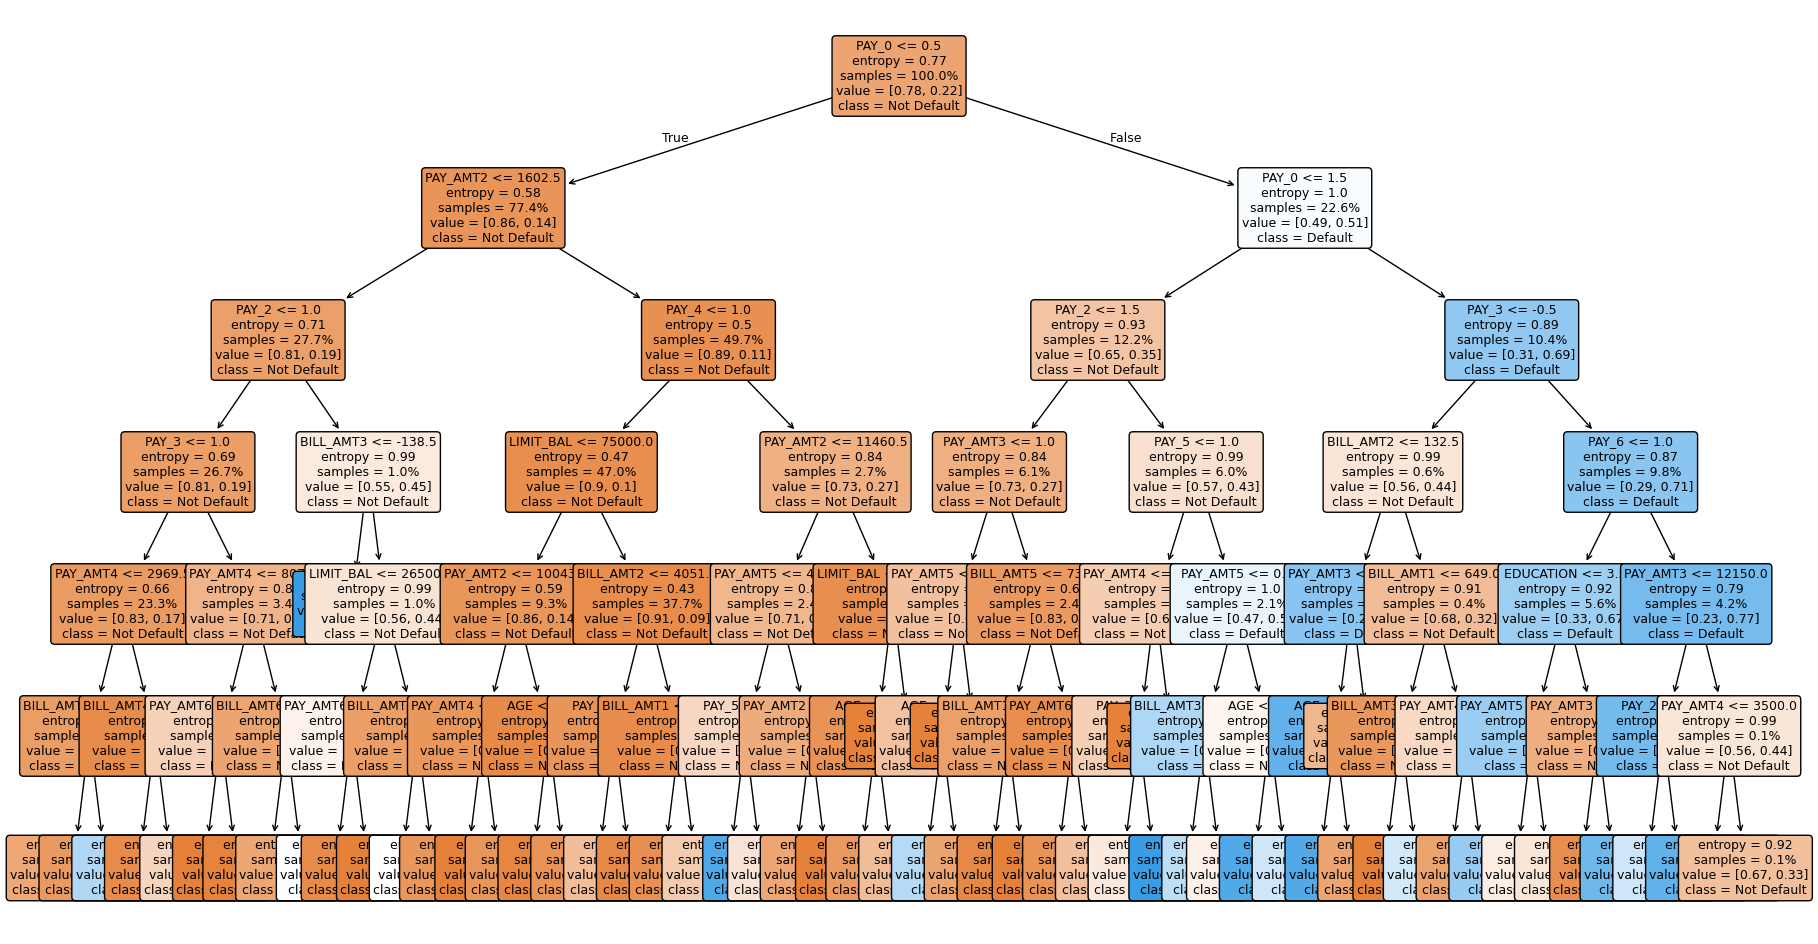

In [ ]:
# Tree Visualization
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

print(f"Best parameters found: {clf.best_params_}")
plt.figure(figsize=(22, 12)) # Adjust figure size for better readability

plot_tree(best_model,
          feature_names=predictors, 
          class_names=['Not Default', 'Default'],
          max_depth = 3,
          # predictors=predictors,
          # target=target,
          proportion=True,
          filled=True,        # Color nodes with class/value
          rounded=True,       # Round the corners of the boxes
          precision=2,        # Decimal precision for thresholds
          fontsize=9)        # Adjust font size
plt.show()


Best parameters found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}


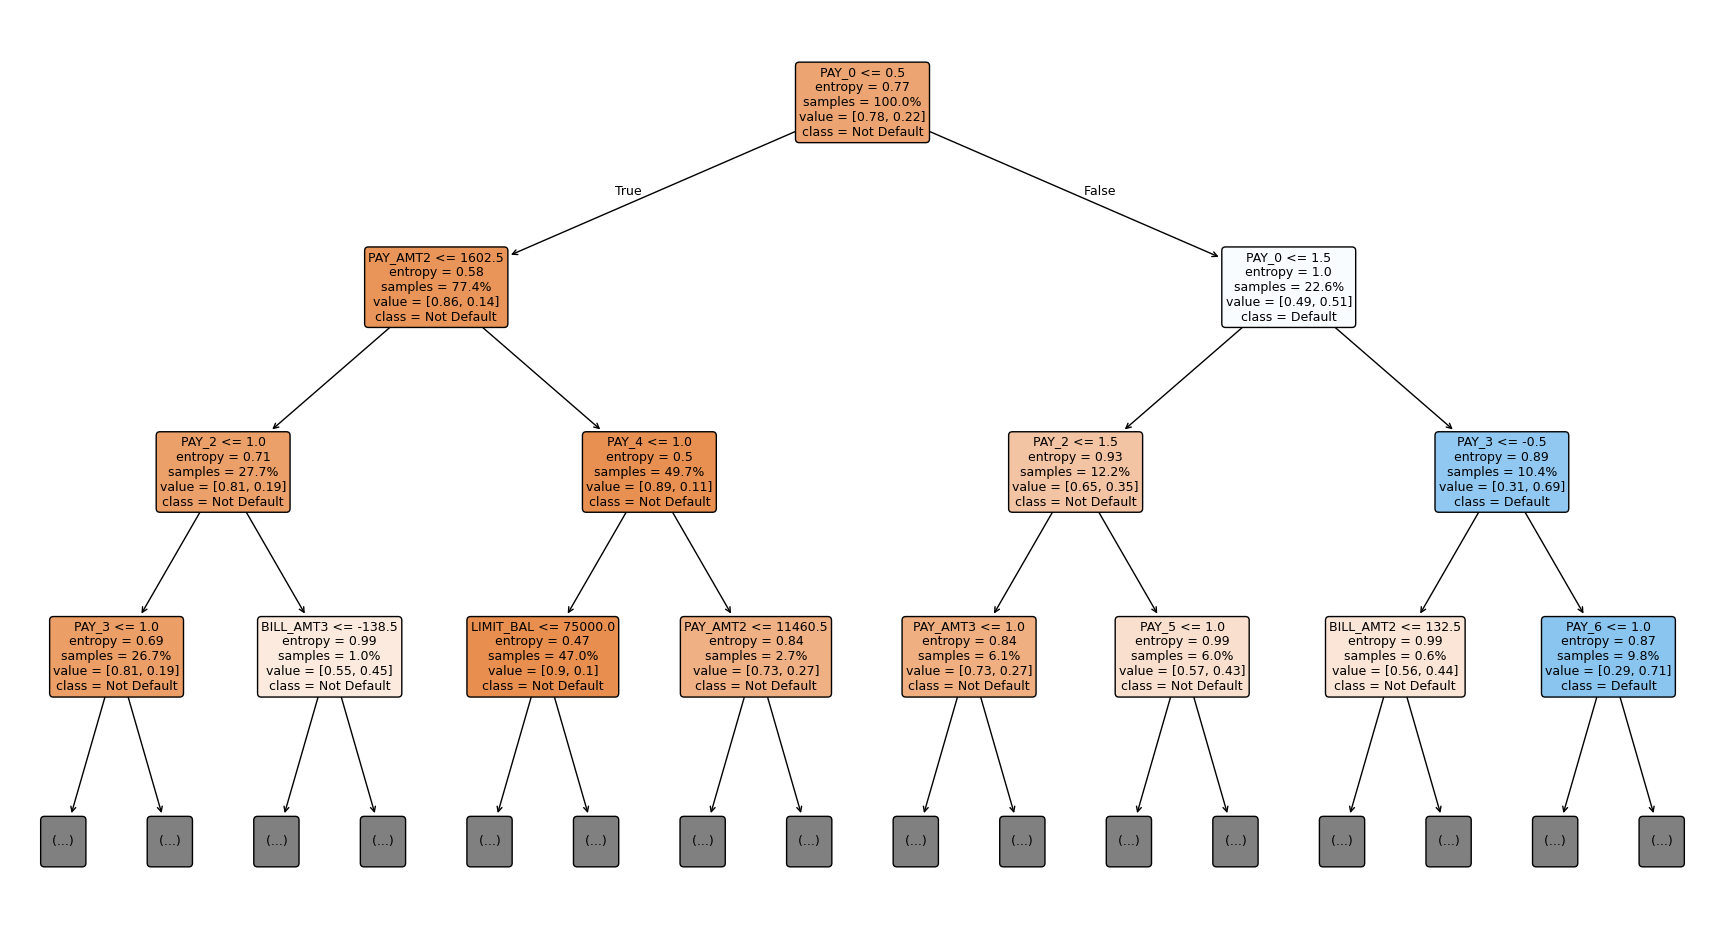

In [11]:
# Tree Visualization
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

print(f"Best parameters found: {clf.best_params_}")
plt.figure(figsize=(22, 12)) # Adjust figure size for better readability

plot_tree(best_model,
          feature_names=predictors, 
          class_names=['Not Default', 'Default'],
          max_depth = 3,
          # predictors=predictors,
          # target=target,
          proportion=True,
          filled=True,        # Color nodes with class/value
          rounded=True,       # Round the corners of the boxes
          precision=2,        # Decimal precision for thresholds
          fontsize=9)        # Adjust font size
plt.show()


In [12]:
data_df['PAY_3'].describe

<bound method NDFrame.describe of 0       -1
1        0
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    2
29998    0
29999    0
Name: PAY_3, Length: 30000, dtype: int64>

* Conbine our dataset to understand that decision tree *

In [57]:
# Their are in total 20% people will go default next month
print(train_df['default payment next month'].value_counts())

#print('----------------------------')
print('\n')
print(val_df['default payment next month'].value_counts())
print('\n')
print(predictors)

default payment next month
0    18656
1     5344
Name: count, dtype: int64


default payment next month
0    4708
1    1292
Name: count, dtype: int64


['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [58]:
train_df['PAY_AMT1'].describe()

count     24000.000000
mean       5758.885333
std       17197.492470
min           0.000000
25%        1000.000000
50%        2124.000000
75%        5013.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

# a. RandomForestClassifier




## 1. Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion
1. **GINI**, which formula is **GINI = 2 * (AUC) - 1**,
2. **AUC** is the **Receiver Operating Characteristic - Area Under Curve (ROC-AUC)**.  
Number of estimators is set to **100** and number of parallel jobs is set to **4**.

In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

# Initializing the RandomForestClassifier.
clf_rf = RandomForestClassifier(n_jobs=NO_JOBS,
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

## 2. Train the RandomForestClassifier using the train_df data and fit function.

In [60]:
clf_rf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Let's now predict the **target** values for the **val_df** data, using **predict** function.

In [61]:
preds = clf_rf.predict(val_df[predictors])

## 3. Features importance

C:\Users\taro\AppData\Local\Temp\ipykernel_19240\2154126157.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


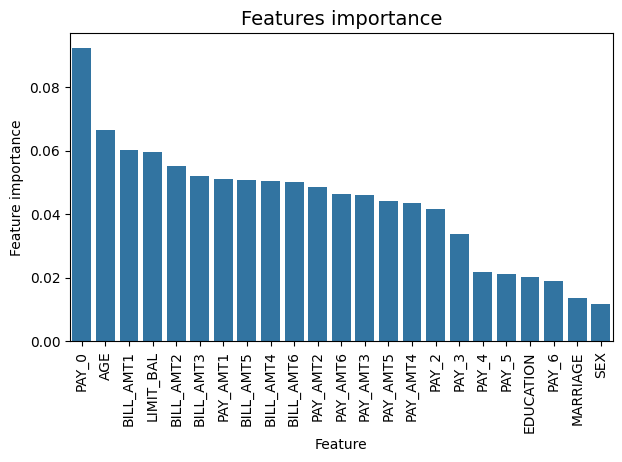

In [62]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf_rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


The most important features are **PAY_0**, **AGE**, **BILL_AMT1**, **LIMIT_BAL**, **BILL_AMT2**, **BILL_AMT3**.


## 4. Confusion matrix

Let's show a confusion matrix for the results we obtained.

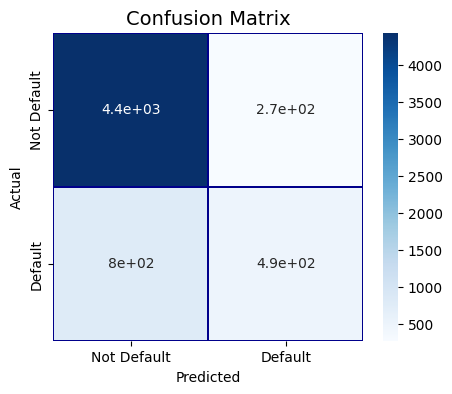

In [63]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,4))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [64]:
# AUC score
roc_auc_score(val_df[target].values, preds)

0.6625018741566295

The **ROC-AUC** score obtained with **RandomForrestClassifier** is **0.66**.


Let's use for RandomForrestClassifier **dummified variables** for the **categorical features**.


We start by defining the categorical features.


## 5. RandomForrest with OneHotEncoder

In [65]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [66]:
# make copies of the train_df and val_df for later usage.
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()


train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [67]:
print("Default of Credit Card Clients train data -  rows:",train_f_df.shape[0]," columns:", train_f_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_f_df.shape[0]," columns:", val_f_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 93
Default of Credit Card Clients val  data -  rows: 6000  columns: 86


Because train and validation data does not have the same number of columns, we will align them.

In [68]:
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

Let's check again the data.

In [69]:
print("Default of Credit Card Clients train data -  rows:",train_fa_df.shape[0]," columns:", train_fa_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_fa_df.shape[0]," columns:", val_fa_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 93
Default of Credit Card Clients val  data -  rows: 6000  columns: 93


In [70]:
train_fa_df.head(5)
#PAY_0: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default payment next month
22659,48,175095,175522,173918,174074,178671,178869,False,False,False,True,False,False,False,22660,150000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,10011,6200,5874,10000,6054,7108,False,True,0
6618,37,8788,40927,28306,31578,21195,11776,False,False,True,False,False,False,False,6619,180000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,40970,1210,10015,10009,11783,110306,True,False,0
26605,23,2400,2400,2400,2400,2400,1800,False,False,True,False,False,False,False,26606,20000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,0,0,0,0,0,0,True,False,1
2504,30,440,30404,0,880,150,430,False,False,True,False,False,False,False,2505,180000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,30404,0,880,150,430,747,True,False,0
1111,44,3424,155,1922,1473,1865,835,False,False,False,True,False,False,False,1112,50000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,155,1922,1473,1865,835,1833,False,True,0


In [71]:
val_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default payment next month
8343,30,37522,38614,39671,40213,41064,43382,False,False,True,False,False,False,False,8344,50000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,2000,2000,1500,1500,3000,2000,False,True,0
2228,29,53274,54093,53111,50568,47791,45421,False,False,True,False,False,False,False,2229,60000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,2591,2109,1705,2010,2000,1523,False,True,0
6293,55,2326,4917,4906,4707,2254,5375,False,True,False,False,False,False,False,6294,280000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,4917,2453,2254,0,5375,1165,True,False,0
16805,43,4166,4166,4216,4166,4166,4166,False,False,False,True,False,False,False,16806,50000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,True,False,False,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,4166,4216,4116,4166,4166,4166,True,False,0
3519,34,383973,380082,389694,342198,344808,347188,False,False,True,False,False,False,False,3520,550000,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,15000,20000,20000,12000,12000,13000,False,True,0


Let's define the target and predictors lists.

In [72]:
target_f = 'default payment next month'
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'LIMIT_BAL', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_-2', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

Let's train the **RandonForestClassifier** using the **train_fa_df** data and **fit** function.

In [73]:
clf.fit(train_fa_df[predictors_f], train_df[target_f].values)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Let's now predict the **target** values for the **val_df** data, using **predict** function.

In [74]:
preds = clf.predict(val_fa_df[predictors_f])

Let's also visualize the features importance.

## 6. Features importance

C:\Users\taro\AppData\Local\Temp\ipykernel_19240\1427779062.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


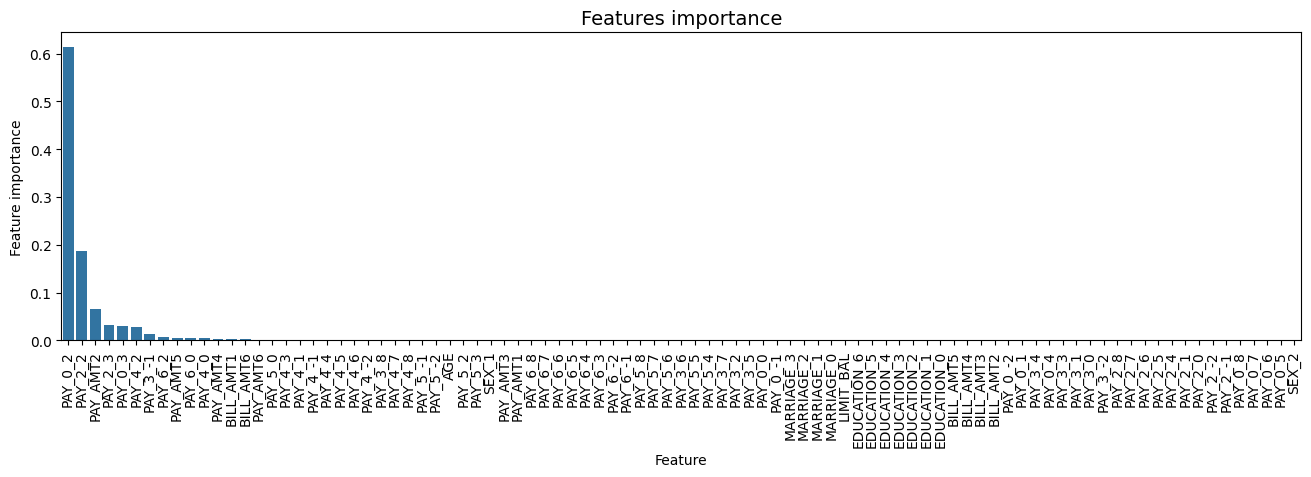

In [77]:
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

The most important features are **AGE**, **LIMIT_BAL**, **BILL_AMT1**, **PAY_0_2**, **BILL_AMT2**, **BILL_AMT3**.

## 7. Confusion matrix

Let's show a confusion matrix for the results we obtained.

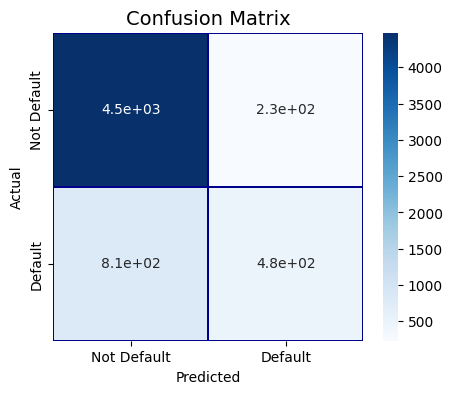

In [78]:
cm = pd.crosstab(val_fa_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,4))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

We also calculate area under curve (receiver operator characteristic)

In [79]:
roc_auc_score(val_fa_df[target].values, preds)
clf_rf_onehot = clf

With the dummified features, the improvement of the AUC score is quite small.

# b. AdaBoostClassifier
AdaBoostClassifier stands for Adaptive Boosting Classifier <a href='#8'>[5]</a>.



## 1. Prepare the model

Set the parameters for the model and initialize the model.

In [80]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

## 2. Fit the model

Let's fit the model.

In [81]:
clf.fit(train_df[predictors], train_df[target].values)

e:\python3.10.9\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=100,
                   random_state=2018)

## 3. Predict the target values

Let's now predict the **target** values for the **val_df** data, using predict function.

In [82]:
preds = clf.predict(val_df[predictors])

## 4. Features importance

Let's see also the features importance.

C:\Users\taro\AppData\Local\Temp\ipykernel_19240\1428594667.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


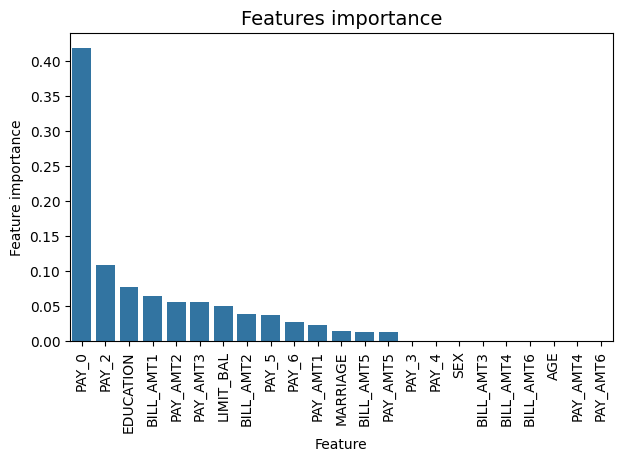

In [83]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## 5. Confusion matrix

Let's visualize the confusion matrix.

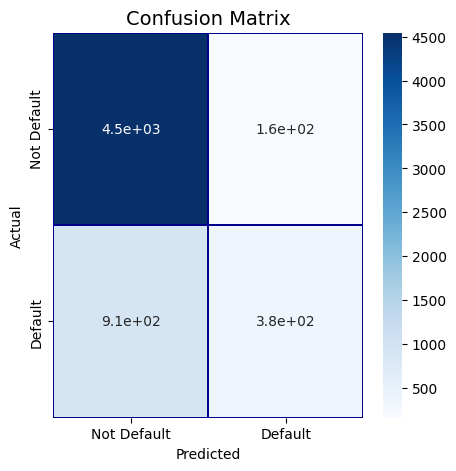

In [84]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.


## 6. Area under curve

In [85]:
roc_auc_score(val_df[target].values, preds)
clf_ada = clf

The ROC-AUC score obtained with AdaBoostClassifier is 0.65.

# c. CatBoostClassifier


CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data.


In [86]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [87]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 265ms	remaining: 2m 11s
50:	total: 5.17s	remaining: 45.5s
100:	total: 9.88s	remaining: 39s
150:	total: 14.5s	remaining: 33.5s
200:	total: 19.3s	remaining: 28.7s
250:	total: 24.1s	remaining: 24s
300:	total: 29.2s	remaining: 19.3s
350:	total: 33.8s	remaining: 14.4s
400:	total: 38.3s	remaining: 9.46s
450:	total: 42.9s	remaining: 4.66s
499:	total: 47.2s	remaining: 0us


## 2. Predict the target values

Let's now predict the **target** values for the **val_df** data, using predict function.

In [88]:
preds = clf.predict(val_df[predictors])

## 3. Features importance

Let's see also the features importance.

C:\Users\taro\AppData\Local\Temp\ipykernel_19240\1428594667.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


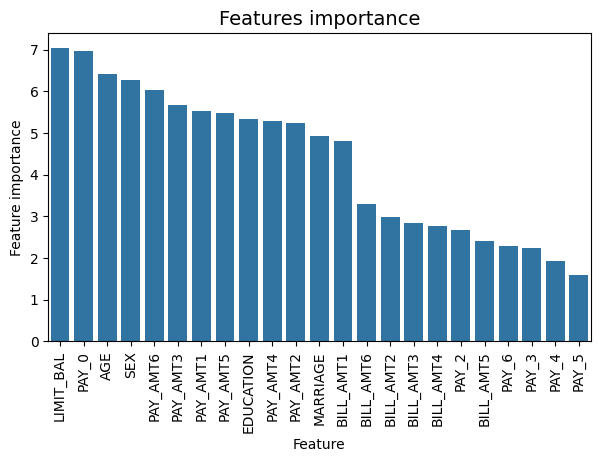

In [89]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## 4. Confusion matrix

Let's visualize the confusion matrix.

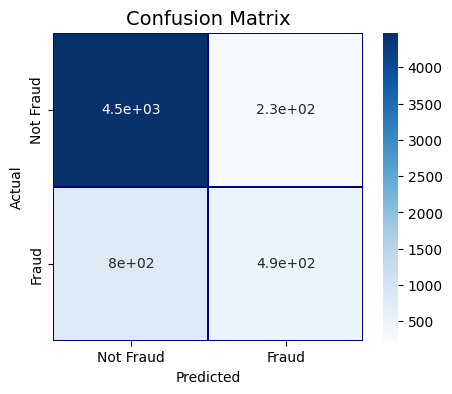

In [90]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,4))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.


## 5. Area under curve

In [91]:
roc_auc_score(val_df[target].values, preds)
clf_cat = clf

The ROC-AUC score obtained with CatBoostClassifier is 0.66.

# d. XGBoost

## 1. Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [92]:
rename_dict = {
    'default payment next month' : 'default.payment.next.month'
}
data_df.rename_axis(columns=rename_dict, inplace=True)

In [93]:
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [94]:
train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)


target = 'default payment next month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [95]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

## 2. Train the model

In [96]:
model = xgb.train(params,
                dtrain,
                MAX_ROUNDS,
                watchlist,
                early_stopping_rounds=EARLY_STOP,
                maximize=True,
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.69228	valid-auc:0.69764
[50]	train-auc:0.76986	valid-auc:0.76557


e:\python3.10.9\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
e:\python3.10.9\lib\site-packages\xgboost\callback.py:386: UserWarning: [16:31:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()


[100]	train-auc:0.77820	valid-auc:0.77358
[150]	train-auc:0.78298	valid-auc:0.77706
[200]	train-auc:0.78654	valid-auc:0.77900
[250]	train-auc:0.78910	valid-auc:0.78023
[300]	train-auc:0.79128	valid-auc:0.78107
[350]	train-auc:0.79319	valid-auc:0.78196
[400]	train-auc:0.79503	valid-auc:0.78277
[450]	train-auc:0.79660	valid-auc:0.78317
[500]	train-auc:0.79821	valid-auc:0.78341
[550]	train-auc:0.79976	valid-auc:0.78351
[600]	train-auc:0.80086	valid-auc:0.78380
[650]	train-auc:0.80209	valid-auc:0.78388
[700]	train-auc:0.80322	valid-auc:0.78410
[736]	train-auc:0.80412	valid-auc:0.78384


The best validation score (ROC-AUC) was **0.78**, for round **453**.

## 3. Plot variable importance

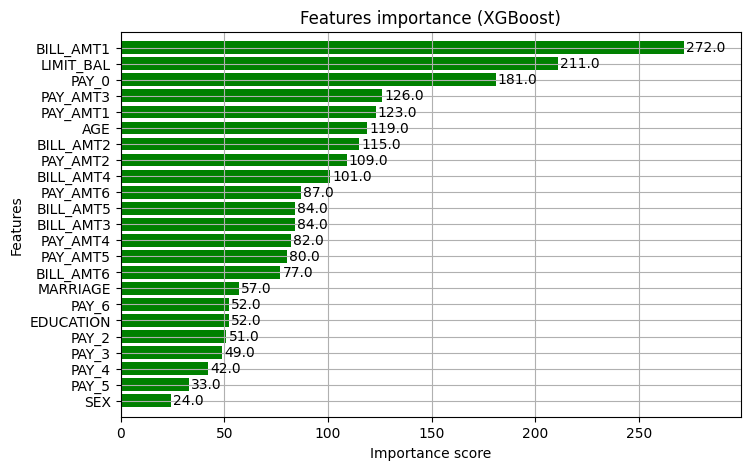

In [97]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")
plt.show()

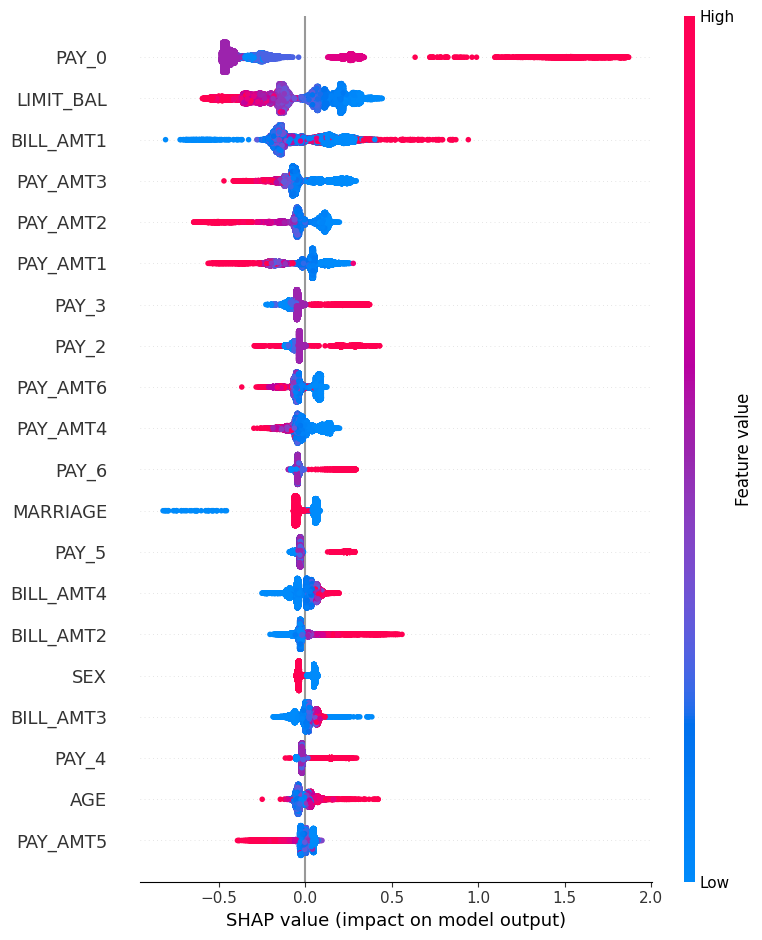

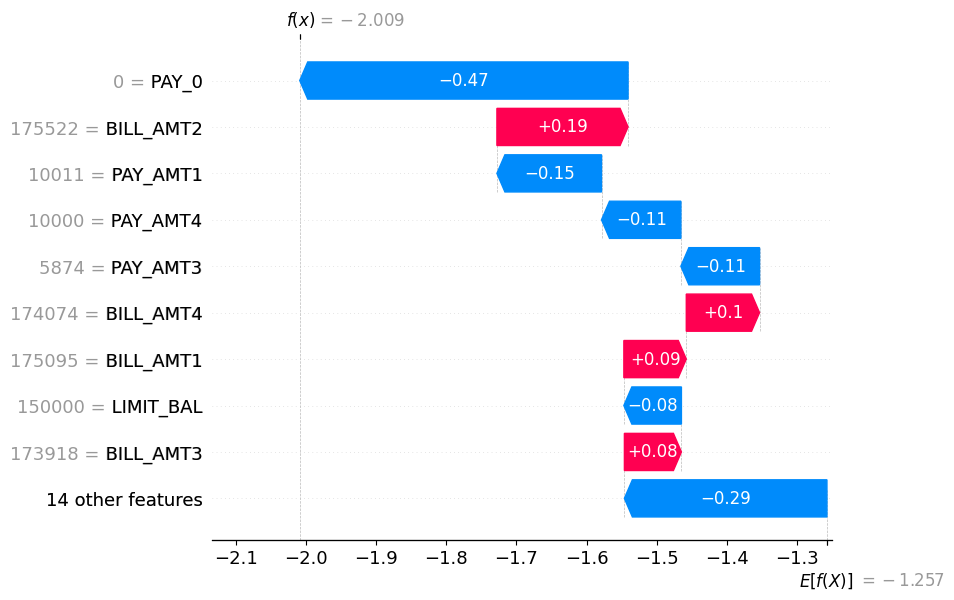

In [98]:
import shap

X_train = train_df[predictors]
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)   # shape: [n_samples, n_features]

# Visualization
shap.initjs()

i = 0
shap.force_plot(explainer.expected_value, shap_values[i, :], X_train.iloc[i, :])

# summary plot
shap.summary_plot(shap_values, features=X_train, feature_names=predictors)

# single sample waterfall
exp = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=X_train.iloc[i].values,
    feature_names=predictors
)
shap.waterfall_plot(exp)
clf_xgb = model

# e. LightGBM

Let's continue with another gradient boosting algorithm, LightGBM.


## 1. Define model parameters

In [99]:
import lightgbm as lgb
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced
         }

## 2. Define the categorical features.

In [100]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

## 3. Prepare the model, creating the **Dataset**s data structures from the train and validation sets.

We will also initialize the Datasets with the list of the categorical features (**lgb** has a special treatment for categorical values).

In [101]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

## 4. Let's run the model, using the **train** function.

In [102]:
import gc
import lightgbm as lgb

evals_result = {}
model = lgb.train(params,
                  dtrain,
                  num_boost_round=100,  # Replace 100 with your desired number of rounds
                  valid_sets=[dvalid],  # Use validation set for monitoring
                  valid_names=['valid'],
)

del dvalid
gc.collect()

[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN


56657

Plot variable importance.

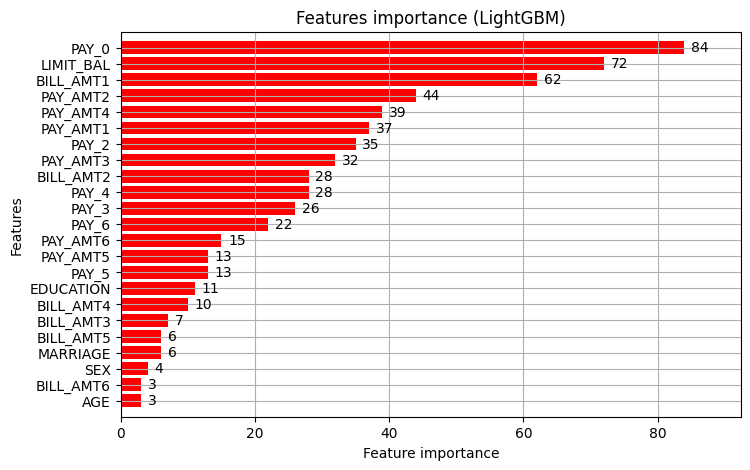

In [103]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red")
plt.show()

## 5. Training and validation using cross-validation

Let's use now cross-validation. We will use cross-validation (KFolds) with 5 folds. Data is divided in 5 folds and, by rotation, we are training using 4 folds (n-1) and validate using the 5th (nth) fold.

In [104]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)
for train_index, test_index in kf.split(data_df):
    train_X, valid_X = data_df.iloc[train_index], data_df.iloc[test_index]

    dtrain = lgb.Dataset(train_X[predictors].values, label=train_X[target].values,
                     feature_name=predictors)

    dvalid = lgb.Dataset(valid_X[predictors].values, label=valid_X[target].values,
                     feature_name=predictors)

    evals_results = {}
    model =  lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dvalid],
                  valid_names=['train','valid'],

                  feval=None)

In [106]:
y_true = valid_X[target].values  # True labels from validation set
y_pred = model.predict(valid_X[predictors].values)  # Predicted probabilities

# Calculate and print AUC score
auc_score = roc_auc_score(y_true, y_pred)
print(f"AUC Score: {auc_score:.4f}")
clf_lgb = model

AUC Score: 0.7804


The average validation **AUC** for the 5 folds obtained was **0.78**, with values between **0.778** and **0.79**.

# Tree models conclusion

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.   

We then investigated five predictive models:  
* We started with **RandomForrestClassifier**, for which we obtained an AUC scode of **0.66**.
   For the **RandomForrestClassifier** we also experimented with **OneHotEncoder**, replacing the categorical features with dummified values (introducing one dummy variable for each category). The AUC score did not improved significantly in this case.
* Next we used  an **AdaBoostClassifier** model, with lower AUC score (**0.63**).   
* We followed with an **CatBoostClassifier** model, with lower AUC score (**0.66**).   
* Then we experimented with a **XGBoost** model, for which the AUC score obtained was **0.77**.   
* We then presented the data to a **LightGBM** model. We used both train-validation split and cross-validation to evaluate the model effectiveness to predict the target value, i.e. detecting if a credit card client  will default next month. With both methods for LightGBM the obtained values of AUC for the validation set were around **0.78**.

# f. Tabnet Neural Network

## 1. Loads packages

In [107]:
import os, sys, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.metrics import Metric
np.random.seed(42)
torch.manual_seed(42)
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = "1"
# print("PyTorch:", torch.__version__)


## 2. Loads data and check target colum

In [108]:

data_path = r"D:\新建文件夹\Default-of-Credit-Card-Clients-Dataset-Analisys-main\tabnet_application\default_of_credit_card_clients.csv"

df = pd.read_csv(data_path)

df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)

aliases = [
    "default payment next month",
    "default_payment_next_month",
    "DEFAULT",
    "default"
]
tgt = None
for name in aliases:
    if name in df.columns:
        tgt = name
        break
if tgt is None:
    print(df.columns.tolist())
    raise ValueError("Did not find target column, please add actual column name in aliases")
df = df.rename(columns={tgt: "target"})
assert "target" in df.columns

print("Rows, Cols:", df.shape)
df.head(3)


Rows, Cols: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


## 3. Data cleaning and future preparation

In [109]:

df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

y = df["target"].astype(int).values

if not set(np.unique(y)).issubset({0,1}):
    y = (y > 0).astype(int)
assert set(np.unique(y)).issubset({0,1})

# delete non-feature columns
drop_cols = [c for c in ["ID", "target"] if c in df.columns]
X_df = df.drop(columns=drop_cols).copy()

print("Label distribution:", pd.Series(y).value_counts().to_dict())
X_df.head(3)


Label distribution: {0: 23364, 1: 6636}


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


## 4. Detect and encode categorical features

In [110]:
categorical_cols = []
for col in X_df.columns:
    if str(X_df[col].dtype)[:3] in ['int','Int'] and X_df[col].nunique() <= 50:
        categorical_cols.append(col)

cat_idxs, cat_dims = [], []
for i, col in enumerate(X_df.columns):
    if col in categorical_cols:

        X_df[col] = X_df[col].astype(int)
        minv = int(X_df[col].min())
        if minv < 0:
            X_df[col] = X_df[col] - minv

        uniq = np.sort(X_df[col].unique())
        mapping = {v:i for i,v in enumerate(uniq)}
        X_df[col] = X_df[col].map(mapping).astype(int)
        cat_idxs.append(i)
        cat_dims.append(int(X_df[col].nunique()))

print("Categorical columns:", categorical_cols[:10], "... total:", len(categorical_cols))
print("cat_idxs len:", len(cat_idxs), " cat_dims len:", len(cat_dims))


Categorical columns: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] ... total: 9
cat_idxs len: 9  cat_dims len: 9


In [111]:

num_cols = [c for c in X_df.columns if c not in categorical_cols]
scaler = StandardScaler()
if len(num_cols) > 0:
    X_df[num_cols] = scaler.fit_transform(X_df[num_cols])

X = X_df.values
assert np.isfinite(X).all(), "X contains NaN/Inf"

X.shape, len(num_cols), len(categorical_cols)


((30000, 23), 14, 9)

## 5. Train-validation test split

In [112]:
from math import ceil

def safe_stratified_split(X, y, test_size, seed):
    counts = pd.Series(y).value_counts()

    can_stratify = (counts.min() >= 2)
    if can_stratify:
        return train_test_split(X, y, test_size=test_size, stratify=y, random_state=seed)
    else:
        print("Warn: cannot stratify (min class too small), fallback to non-stratified split")
        return train_test_split(X, y, test_size=test_size, random_state=seed)

X_train, X_temp, y_train, y_temp = safe_stratified_split(X, y, test_size=0.20, seed=42)
X_valid, X_test, y_valid, y_test = safe_stratified_split(X_temp, y_temp, test_size=0.20, seed=42)

for name, yy in [('train', y_train), ('valid', y_valid), ('test', y_test)]:
    print(name, pd.Series(yy).value_counts().to_dict())


train {0: 18691, 1: 5309}
valid {0: 3738, 1: 1062}
test {0: 935, 1: 265}


In [113]:
class Gini(Metric):
    def __init__(self):
        self._name = "gini"
        self._maximize = True
    def __call__(self, y_true, y_score):
        auc = roc_auc_score(y_true, y_score[:, 1])
        return max(2*auc - 1, 0.)


## 6. Run the Tabnet model


In [114]:
tabnet_params = dict(
    n_d=64, n_a=64,
    n_steps=6,
    gamma=1.5,
    n_independent=2, n_shared=2,
    cat_idxs=cat_idxs, cat_dims=cat_dims, cat_emb_dim=2,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-3),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size":20, "gamma":0.9},
    mask_type='sparsemax',
    verbose=10,
    device_name='cuda'
)

clf = TabNetClassifier(**tabnet_params)
clf_tb = clf
clf_tb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train','valid'],
    eval_metric=['auc', Gini],
    max_epochs=500,
    patience=30,
    batch_size=2048,
    virtual_batch_size=256,
    num_workers=0,
    weights=1
)


e:\python3.10.9\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.91121 | train_auc: 0.52669 | train_gini: 0.05338 | valid_auc: 0.54365 | valid_gini: 0.0873  |  0:00:01s
epoch 10 | loss: 0.6774  | train_auc: 0.70741 | train_gini: 0.41482 | valid_auc: 0.6904  | valid_gini: 0.3808  |  0:00:12s
epoch 20 | loss: 0.62752 | train_auc: 0.73491 | train_gini: 0.46981 | valid_auc: 0.72741 | valid_gini: 0.45482 |  0:00:24s
epoch 30 | loss: 0.61059 | train_auc: 0.74779 | train_gini: 0.49558 | valid_auc: 0.74179 | valid_gini: 0.48358 |  0:00:35s
epoch 40 | loss: 0.59829 | train_auc: 0.75056 | train_gini: 0.50111 | valid_auc: 0.74254 | valid_gini: 0.48507 |  0:00:45s
epoch 50 | loss: 0.59239 | train_auc: 0.75832 | train_gini: 0.51665 | valid_auc: 0.75163 | valid_gini: 0.50326 |  0:00:55s
epoch 60 | loss: 0.58355 | train_auc: 0.76447 | train_gini: 0.52894 | valid_auc: 0.75023 | valid_gini: 0.50047 |  0:01:05s
epoch 70 | loss: 0.58058 | train_auc: 0.76532 | train_gini: 0.53064 | valid_auc: 0.74702 | valid_gini: 0.49403 |  0:01:15s
epoch 80 | loss:

e:\python3.10.9\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## 7. Model performance analysis

In [115]:
pred_valid = clf.predict_proba(X_valid)[:, 1]
pred_test  = clf.predict_proba(X_test)[:, 1]

auc_valid = roc_auc_score(y_valid, pred_valid)
auc_test  = roc_auc_score(y_test, pred_test)
ap_test   = average_precision_score(y_test, pred_test)
fpr, tpr, thr = roc_curve(y_test, pred_test)
ks = float(np.max(tpr - fpr))

print(f"AUC(valid)={auc_valid:.4f}  AUC(test)={auc_test:.4f}  AP(test)={ap_test:.4f}  KS(test)={ks:.4f}")

fi = pd.Series(clf.feature_importances_, index=X_df.columns).sort_values(ascending=False)
display(fi)
fi.shape


AUC(valid)=0.7640  AUC(test)=0.7363  AP(test)=0.5101  KS(test)=0.3543


PAY_0        0.196873
LIMIT_BAL    0.079994
PAY_2        0.078426
BILL_AMT4    0.074638
PAY_AMT1     0.063905
PAY_AMT5     0.057974
BILL_AMT1    0.049438
PAY_4        0.045672
MARRIAGE     0.043420
PAY_6        0.032772
PAY_AMT3     0.032591
AGE          0.031040
BILL_AMT3    0.029622
PAY_AMT2     0.029470
BILL_AMT6    0.028877
PAY_AMT4     0.021606
PAY_5        0.021057
BILL_AMT5    0.017498
PAY_AMT6     0.017309
SEX          0.015596
EDUCATION    0.013164
BILL_AMT2    0.010749
PAY_3        0.008313
dtype: float64

(23,)

## 8. Save and reload model

In [116]:
save_path = clf.save_model("./tabnet_credit_default")
print("saved:", save_path)

from pytorch_tabnet.tab_model import TabNetClassifier as TNC
loaded = TNC()
loaded.load_model(save_path)
print("loaded ok")


Successfully saved model at ./tabnet_credit_default.zip
saved: ./tabnet_credit_default.zip
loaded ok


e:\python3.10.9\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
e:\python3.10.9\lib\site-packages\pytorch_tabnet\abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loa

## 9. Normalize attention masks utility

In [117]:
import numpy as np

def normalize_masks(masks):
    """
    Normalize TabNet masks to shape (n_samples, n_steps, n_features).
    Supports: list[np.ndarray], np.ndarray, dict with lists/arrays.
    """
    # Case A: list of step masks -> stack along step axis
    if isinstance(masks, list):
        return np.stack(masks, axis=1)  # (N, steps, F)

    # Case B: dict -> try common keys or sort by step keys
    if isinstance(masks, dict):
        for key in ["masks", "step_masks", "attentive_masks"]:
            if key in masks:
                val = masks[key]
                if isinstance(val, list):
                    return np.stack(val, axis=1)
                if isinstance(val, np.ndarray):
                    return val  # assume already (N, steps, F)
        # fallback: dict of step->array
        if all(hasattr(v, "shape") for v in masks.values()):
            ordered = [masks[k] for k in sorted(masks.keys())]
            return np.stack(ordered, axis=1)

    # Case C: already an array
    if isinstance(masks, np.ndarray):
        if masks.ndim == 2:
            # maybe (steps, F) per single sample -> expand
            return masks[None, ...]
        return masks

    raise TypeError(f"Unsupported masks type: {type(masks)}")


## 10. Explainability visualization

M_explain shape: (4800, 23)
mask_stack shape: (4800, 6, 23)


PAY_0        0.196873
LIMIT_BAL    0.079994
PAY_2        0.078426
BILL_AMT4    0.074638
PAY_AMT1     0.063905
PAY_AMT5     0.057974
BILL_AMT1    0.049438
PAY_4        0.045672
MARRIAGE     0.043420
PAY_6        0.032772
PAY_AMT3     0.032591
AGE          0.031040
BILL_AMT3    0.029622
PAY_AMT2     0.029470
BILL_AMT6    0.028877
PAY_AMT4     0.021606
PAY_5        0.021057
BILL_AMT5    0.017498
PAY_AMT6     0.017309
SEX          0.015596
dtype: float64

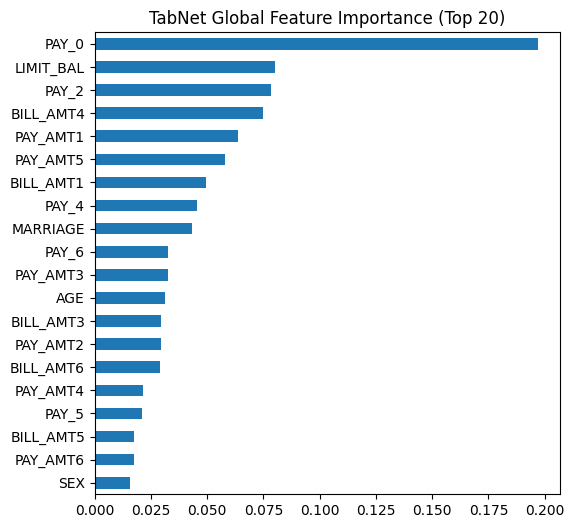

Reason codes for sample #0 (Top-10):


LIMIT_BAL    23.773733
SEX          12.584682
MARRIAGE     10.536665
PAY_0         5.468694
BILL_AMT4     4.998320
BILL_AMT5     4.404034
BILL_AMT3     0.000000
PAY_AMT5      0.000000
PAY_AMT4      0.000000
PAY_AMT3      0.000000
dtype: float64

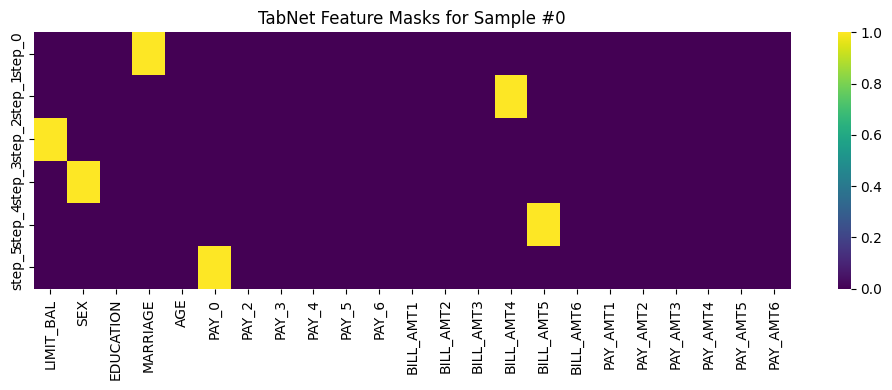

In [118]:
# TabNet Interpretability (Global Importance + Single-sample Top-K Reason Codes + Decision Step Heatmap)

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Get explanations from TabNet
# Compatible with both DataFrame and ndarray inputs
Xv_np = X_valid.values if hasattr(X_valid, "values") else X_valid
M_explain, masks = clf.explain(Xv_np)   # M_explain: (N, F); masks: may vary by implementation version

# Normalize masks to shape (N, steps, F)
def normalize_masks(m):
    if isinstance(m, list):                     # list[step_mask] -> (N, steps, F)
        return np.stack(m, axis=1)
    if isinstance(m, dict):                     # dict: look for common keys or sort by step index
        for k in ["masks", "step_masks", "attentive_masks"]:
            if k in m:
                v = m[k]
                return np.stack(v, axis=1) if isinstance(v, list) else v
        if all(hasattr(v, "shape") for v in m.values()):
            ordered = [m[k] for k in sorted(m.keys())]
            return np.stack(ordered, axis=1)
    if isinstance(m, np.ndarray):               # already ndarray
        return m if m.ndim == 3 else m[None, ...]
    raise TypeError(f"Unsupported masks type: {type(m)}")

mask_stack = normalize_masks(masks)             # (N, steps, F)

print("M_explain shape:", getattr(M_explain, "shape", None))
print("mask_stack shape:", getattr(mask_stack, "shape", None))

# Global feature importance (Top 20)
fi_tabnet = pd.Series(clf.feature_importances_, index=X_df.columns).sort_values(ascending=False)
display(fi_tabnet.head(20))
ax = fi_tabnet.head(20).iloc[::-1].plot(
    kind="barh", figsize=(6,6),
    title="TabNet Global Feature Importance (Top 20)"
)
plt.show()
clf_tb = clf
# Single-sample Top-K reason codes
K = 10
sample_idx = 0  # change this index to visualize a different sample
per_sample_imp = pd.Series(M_explain[sample_idx], index=X_df.columns).sort_values(ascending=False)
print(f"Reason codes for sample #{sample_idx} (Top-{K}):")
display(per_sample_imp.head(K))

# Decision step heatmap (features used at each step for this sample)
n_steps = mask_stack.shape[1]
plt.figure(figsize=(10, 4))
sns.heatmap(
    mask_stack[sample_idx],
    cmap="viridis",
    xticklabels=X_df.columns,
    yticklabels=[f"step_{i}" for i in range(n_steps)]
)
plt.xticks(rotation=90)
plt.title(f"TabNet Feature Masks for Sample #{sample_idx}")
plt.tight_layout()
plt.show()


# Conclusion

(1) Tree-based Models

RandomForest, AdaBoost, CatBoost, XGBoost, and LightGBM models were tested sequentially.
XGBoost achieved an AUC of 0.77, establishing a strong benchmark for credit default classification.

(2) TabNet Model

TabNet achieved AUC=0.75 (valid) and KS=0.35 (test), showing slightly lower accuracy but higher interpretability.
Its attention masks revealed repayment history and bill amounts as key default indicators.

(3) Overall Conclusion

While gradient-boosted trees remain superior in raw predictive performance, TabNet provides a balanced trade-off between accuracy and interpretability, making it ideal for risk management systems where explainability is essential.

# Implement Neyman Person Hypothesys testing

In [23]:
# import numpy as np
# import xgboost as xgb
# import lightgbm as lgb
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split

# def run_np_analysis(model, model_name, X_val, y_val, alpha=0.01):
    
#     print(f"Running NP Analysis for: {model_name}")

#     X_cal, X_test, y_cal, y_test = train_test_split(
#         X_val, y_val, test_size=0.5, random_state=42, stratify=y_val
#     )
    
#     try:
#         if hasattr(model, "predict_proba"):
#             print(" -> Mode: Scikit-Learn API (predict_proba)")
#             y_cal_proba = model.predict_proba(X_cal)[:, 1]
#             y_test_proba = model.predict_proba(X_test)[:, 1]
            
#         elif hasattr(model, "predict"):

#             model_type_str = str(type(model))
            
#             if "xgboost" in model_type_str:
#                 print(" -> Mode: Native XGBoost (DMatrix)")
#                 dcal = xgb.DMatrix(X_cal)
#                 dtest = xgb.DMatrix(X_test)
#                 y_cal_proba = model.predict(dcal)
#                 y_test_proba = model.predict(dtest)
                
#             elif "lightgbm" in model_type_str:
#                 print(" -> Mode: Native LightGBM (Direct Predict)")

#                 y_cal_proba = model.predict(X_cal)
#                 y_test_proba = model.predict(X_test)

#         else:
#             raise AttributeError("Model has neither predict_proba nor predict methods.")
            
#     except Exception as e:
#         print(f"\n[Error] prediction errors: {e}")
#         return 0.0

#     neg_scores = y_cal_proba[y_cal == 0]
#     threshold = np.percentile(neg_scores, (1 - alpha) * 100)
    
#     print(f" -> Target FPR: <= {alpha:.1%}")
#     print(f" -> Calculated Threshold: {threshold:.4f}")

#     pred_test = (y_test_proba > threshold).astype(int)
#     tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
    
#     realized_fpr = fp / (fp + tn)
#     realized_recall = tp / (tp + fn)
    
#     print(f"\n[Test Set Performance]")
#     print(f" -> Realized FPR:   {realized_fpr:.2%}  ({'✅ Pass' if realized_fpr <= alpha + 0.015 else 'High Risk'})")
#     print(f" -> Realized Recall: {realized_recall:.2%} (Max power under compliance)")

#     print(f"\n[Running Bootstrap Test (1000 iter)...]")
#     boot_recalls = []
#     np.random.seed(2025)
    
#     for _ in range(1000):
#         indices = np.random.choice(len(y_test_proba), len(y_test_proba), replace=True)
#         y_true_boot = y_test[indices]
#         y_score_boot = y_test_proba[indices]
        
#         p_boot = (y_score_boot > threshold).astype(int)
#         tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_boot, p_boot).ravel()
        
#         if (tp_b + fn_b) > 0:
#             boot_recalls.append(tp_b / (tp_b + fn_b))
#         else:
#             boot_recalls.append(0)
        
#     avg_recall = np.mean(boot_recalls)
#     print(f" -> Bootstrap Average Recall: {avg_recall:.2%}")
    
#     return avg_recall

import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def run_np_analysis(model, model_name, X_val, y_val, alpha=0.01):

    print(f"Running NP Analysis for: {model_name}")

    X_cal, X_test, y_cal, y_test = train_test_split(
        X_val, y_val, test_size=0.5, random_state=42, stratify=y_val
    )
    
    try:
        if hasattr(model, "predict_proba"):
            # print(" -> Mode: Scikit-Learn API (predict_proba)")
            y_cal_proba = model.predict_proba(X_cal)[:, 1]
            y_test_proba = model.predict_proba(X_test)[:, 1]
            
        elif hasattr(model, "predict"):

            model_type_str = str(type(model))
            
            if "xgboost" in model_type_str:
                print(" -> Mode: Native XGBoost (DMatrix)")
                dcal = xgb.DMatrix(X_cal)
                dtest = xgb.DMatrix(X_test)
                y_cal_proba = model.predict(dcal)
                y_test_proba = model.predict(dtest)
                
            elif "lightgbm" in model_type_str:
                print(" -> Mode: Native LightGBM (Direct Predict)")
                y_cal_proba = model.predict(X_cal)
                y_test_proba = model.predict(X_test)
            else:
                raise AttributeError("Unsupported model type for NP analysis.")

        else:
            raise AttributeError("Model has neither predict_proba nor predict methods.")
            
    except Exception as e:
        print(f"\n[Error] prediction errors: {e}")
        return 0.0

    scores_cal = y_cal_proba
    labels_cal = y_cal

    candidate_thresholds = np.unique(scores_cal)[::-1]

    best_t = None
    best_recall = -1.0
    best_fpr = None

    for t in candidate_thresholds:
        preds = (scores_cal >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(labels_cal, preds, labels=[0, 1]).ravel()

        if (fp + tn) == 0 or (tp + fn) == 0:
            continue

        fpr_cal = fp / (fp + tn)
        recall_cal = tp / (tp + fn)

        if fpr_cal <= alpha and recall_cal > best_recall:
            best_recall = recall_cal
            best_t = t
            best_fpr = fpr_cal

    if best_t is None:
        neg_scores = scores_cal[labels_cal == 0]
        threshold = np.percentile(neg_scores, (1 - alpha) * 100)
        print(" No threshold with Cal FPR <= alpha found, fallback to percentile method.")
        cal_fpr_msg = "N/A (percentile fallback)"
        cal_recall_msg = "N/A (percentile fallback)"
    else:
        threshold = best_t
        cal_fpr_msg = f"{best_fpr:.2%}"
        cal_recall_msg = f"{best_recall:.2%}"

    print(f" Target FPR: <= {alpha:.1%}")
    print(f" Calibration FPR at threshold: {cal_fpr_msg}")
    print(f" Calibration Recall at threshold: {cal_recall_msg}")
    print(f" Calculated Threshold: {threshold:.4f}")

    pred_test = (y_test_proba > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_test, labels=[0, 1]).ravel()
    
    realized_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    realized_recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    
    print(f"\n[Test Set Performance]")
    print(f" Realized FPR:   {realized_fpr:.2%}  ({'### Pass' if realized_fpr <= alpha + 0.015 else 'High Risk'})")
    print(f" Realized Recall: {realized_recall:.2%} (Approx. max power under compliance)")

    print(f"\n[Running Bootstrap Test (1000 iter)...]")
    boot_recalls = []
    np.random.seed(2025)
    
    n_test = len(y_test_proba)
    for _ in range(1000):
        indices = np.random.choice(n_test, n_test, replace=True)
        y_true_boot = y_test[indices]
        y_score_boot = y_test_proba[indices]
        
        p_boot = (y_score_boot > threshold).astype(int)
        tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_boot, p_boot, labels=[0, 1]).ravel()
        
        if (tp_b + fn_b) > 0:
            boot_recalls.append(tp_b / (tp_b + fn_b))
        else:
            boot_recalls.append(0.0)
        
    avg_recall = np.mean(boot_recalls)
    print(f" -> Bootstrap Average Recall: {avg_recall:.2%}")
    
    return avg_recall


e:\python3.10.9\lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [24]:
dt_recall = run_np_analysis(best_model, "Decision Tree", val_df[predictors], val_df[target].values)

Running NP Analysis for: Decision Tree
 Target FPR: <= 1.0%
 Calibration FPR at threshold: 0.21%
 Calibration Recall at threshold: 0.46%
 Calculated Threshold: 0.8929

[Test Set Performance]
 Realized FPR:   0.04%  (### Pass)
 Realized Recall: 0.31% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 0.30%


In [121]:
rf_recall = run_np_analysis(clf_rf, "Random Forest", val_df[predictors], val_df[target].values)

Running NP Analysis for: Random Forest
 -> Mode: Scikit-Learn API (predict_proba)
 -> Target FPR: <= 1.0%
 -> Calibration FPR at threshold: 0.98%
 -> Calibration Recall at threshold: 11.15%
 -> Calculated Threshold: 0.7600

[Test Set Performance]
 -> Realized FPR:   0.68%  (✅ Pass)
 -> Realized Recall: 9.75% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 9.73%


In [122]:
rf_onehot_recall = run_np_analysis(clf_rf_onehot, "Random Forest (One-Hot)", val_fa_df[predictors_f], val_fa_df[target].values)

Running NP Analysis for: Random Forest (One-Hot)
 -> Mode: Scikit-Learn API (predict_proba)
 -> Target FPR: <= 1.0%
 -> Calibration FPR at threshold: 0.08%
 -> Calibration Recall at threshold: 1.86%
 -> Calculated Threshold: 0.8621

[Test Set Performance]
 -> Realized FPR:   0.00%  (✅ Pass)
 -> Realized Recall: 0.00% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 0.00%


In [123]:
rf_ada_recall = run_np_analysis(clf_ada, "AdaBoost", val_df[predictors], val_df[target].values)

Running NP Analysis for: AdaBoost
 -> Mode: Scikit-Learn API (predict_proba)
 -> Target FPR: <= 1.0%
 -> Calibration FPR at threshold: 0.98%
 -> Calibration Recall at threshold: 9.44%
 -> Calculated Threshold: 0.6471

[Test Set Performance]
 -> Realized FPR:   0.85%  (✅ Pass)
 -> Realized Recall: 10.22% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 10.19%


In [124]:
rf_cat_recall = run_np_analysis(clf_cat, "CatBoost", val_df[predictors], val_df[target].values)

Running NP Analysis for: CatBoost
 -> Mode: Scikit-Learn API (predict_proba)
 -> Target FPR: <= 1.0%
 -> Calibration FPR at threshold: 0.93%
 -> Calibration Recall at threshold: 14.40%
 -> Calculated Threshold: 0.7596

[Test Set Performance]
 -> Realized FPR:   1.02%  (✅ Pass)
 -> Realized Recall: 14.09% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 14.07%


In [125]:
rf_xgb_recall = run_np_analysis(clf_xgb, "XGBoost", val_df[predictors], val_df[target].values)

Running NP Analysis for: XGBoost
 -> Mode: Native XGBoost (DMatrix)
 -> Target FPR: <= 1.0%
 -> Calibration FPR at threshold: 0.98%
 -> Calibration Recall at threshold: 12.85%
 -> Calculated Threshold: 0.7467

[Test Set Performance]
 -> Realized FPR:   0.89%  (✅ Pass)
 -> Realized Recall: 14.71% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 14.70%


In [126]:
rf_lgbm_recall = run_np_analysis(clf_lgb, "LightGBM", val_df[predictors], val_df[target].values)

Running NP Analysis for: LightGBM
 -> Mode: Native LightGBM (Direct Predict)
 -> Target FPR: <= 1.0%
 -> Calibration FPR at threshold: 0.81%
 -> Calibration Recall at threshold: 9.75%
 -> Calculated Threshold: 0.9874

[Test Set Performance]
 -> Realized FPR:   0.68%  (✅ Pass)
 -> Realized Recall: 10.37% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 10.39%


In [127]:
rf_tabnet_recall = run_np_analysis(clf_tb, "TabNet", X_valid, y_valid)

Running NP Analysis for: TabNet
 -> Mode: Scikit-Learn API (predict_proba)
 -> Target FPR: <= 1.0%
 -> Calibration FPR at threshold: 0.96%
 -> Calibration Recall at threshold: 6.97%
 -> Calculated Threshold: 0.9028

[Test Set Performance]
 -> Realized FPR:   0.75%  (✅ Pass)
 -> Realized Recall: 12.24% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 12.20%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if hasattr(model, "predict_proba"):
    y_val_scores = model.predict_proba(val_df[predictors])[:, 1]
elif hasattr(model, "predict"): 
    try:
        y_val_scores = model.predict(val_df[predictors])
    except:
        import xgboost as xgb
        dval = xgb.DMatrix(val_df[predictors])
        y_val_scores = model.predict(dval)

y_val_true = val_df[target].values
scores_good = y_val_scores[y_val_true == 0] 
scores_bad = y_val_scores[y_val_true == 1] 

plt.figure(figsize=(10, 6))


sns.histplot(scores_good, color="green", label="Non-Default (Class 0)", kde=True, stat="density", element="step", alpha=0.3)

sns.histplot(scores_bad, color="red", label="Default (Class 1)", kde=True, stat="density", element="step", alpha=0.3)

plt.title("Prediction Score Distribution (The 'Distribution' used by NP)", fontsize=14)
plt.xlabel("Predicted Probability of Default (0 to 1)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import math

# p1 = 0.5
p1 = 0.8
p3 = 0.2

H_p = -p1 * math.log2(p1) - (1-p1) * math.log2(1-p1)
print('For p1, the H_p is:', H_p)




For p1, the H_p is: 0.7219280948873623


In [ ]:
# Control FN()
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def run_np_analysis_fn_hard(model, model_name, X_val, y_val, beta=0.01):
    """
    NP-style analysis with FN as hard constraint:
    - Treat FNR = FN / (TP + FN) as hard constraint (<= beta)
    - Among all thresholds that satisfy FNR <= beta on the calibration set,
      choose the one with the smallest FPR = FP / (FP + TN)
    """

    print(f"Running NP Analysis (FN hard constraint) for: {model_name}\n")

    # 1. split validation into calibration and NP-test
    X_cal, X_test, y_cal, y_test = train_test_split(
        X_val, y_val, test_size=0.5, random_state=42, stratify=y_val
    )
    
    # 2. get scores on calibration and test
    try:
        if hasattr(model, "predict_proba"):
            y_cal_proba = model.predict_proba(X_cal)[:, 1]
            y_test_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "predict"):
            model_type_str = str(type(model))
            if "xgboost" in model_type_str:
                dcal = xgb.DMatrix(X_cal)
                dtest = xgb.DMatrix(X_test)
                y_cal_proba = model.predict(dcal)
                y_test_proba = model.predict(dtest)
            elif "lightgbm" in model_type_str:
                y_cal_proba = model.predict(X_cal)
                y_test_proba = model.predict(X_test)
            else:
                raise AttributeError("Unsupported model type for NP analysis (FN hard).")
        else:
            raise AttributeError("Model has neither predict_proba nor predict methods.")
    except Exception as e:
        print(f"[Error] prediction errors: {e}")
        return 0.0

    scores_cal = y_cal_proba
    labels_cal = y_cal

    # 3. scan thresholds: FNR <= beta (hard), minimize FPR
    candidate_thresholds = np.unique(scores_cal)[::-1]

    best_t = None
    best_fnr = None  # hard constraint value on calibration
    best_fpr = None
    best_recall = None

    for t in candidate_thresholds:
        preds = (scores_cal >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(labels_cal, preds, labels=[0, 1]).ravel()

        if (tp + fn) == 0 or (fp + tn) == 0:
            continue

        fnr_cal = fn / (tp + fn)      # FN rate on defaults
        fpr_cal = fp / (fp + tn)      # FP rate on non-defaults
        recall_cal = tp / (tp + fn)   # 1 - fnr_cal

        # FNR as hard constraint, minimize FPR
        if fnr_cal <= beta:
            if (best_fpr is None) or (fpr_cal < best_fpr):
                best_fpr = fpr_cal
                best_fnr = fnr_cal
                best_recall = recall_cal
                best_t = t

    # 4. fallback: if no threshold satisfies FNR <= beta, take the one with minimal FNR
    if best_t is None:
        print(" No threshold with calibration FNR <= beta found, "
              "fallback to minimal FNR on calibration.\n")

        min_fnr = 1.0
        min_fnr_t = None
        min_fnr_fpr = None
        min_fnr_recall = None

        for t in candidate_thresholds:
            preds = (scores_cal >= t).astype(int)
            tn, fp, fn, tp = confusion_matrix(labels_cal, preds, labels=[0, 1]).ravel()

            if (tp + fn) == 0 or (fp + tn) == 0:
                continue

            fnr_cal = fn / (tp + fn)
            fpr_cal = fp / (fp + tn)
            recall_cal = tp / (tp + fn)

            if fnr_cal < min_fnr:
                min_fnr = fnr_cal
                min_fnr_t = t
                min_fnr_fpr = fpr_cal
                min_fnr_recall = recall_cal

        best_t = min_fnr_t
        best_fnr = min_fnr
        best_fpr = min_fnr_fpr
        best_recall = min_fnr_recall

        cal_fnr_msg = f"{best_fnr:.2%} (fallback)"
        cal_fpr_msg = f"{best_fpr:.2%} (fallback)"
        cal_recall_msg = f"{best_recall:.2%} (fallback)"
    else:
        cal_fnr_msg = f"{best_fnr:.2%}"
        cal_fpr_msg = f"{best_fpr:.2%}"
        cal_recall_msg = f"{best_recall:.2%}"

    threshold = best_t

    print(f" Target FNR (miss rate on defaults): <= {beta:.1%}")
    print(f" Calibration FNR at threshold: {cal_fnr_msg}")
    print(f" Calibration FPR at threshold: {cal_fpr_msg}")
    print(f" Calibration Recall at threshold: {cal_recall_msg}")
    print(f" Selected Threshold: {threshold:.4f}")

    # 5. evaluate on NP test set
    pred_test = (y_test_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_test, labels=[0, 1]).ravel()

    realized_fnr = fn / (tp + fn) if (tp + fn) > 0 else 0.0
    realized_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    realized_recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    print("\n[Test Set Performance]")
    print(f" Realized FNR:    {realized_fnr:.2%}  "
          f"({'Pass' if realized_fnr <= beta + 0.015 else 'High Risk'})")
    print(f" Realized FPR:    {realized_fpr:.2%}")
    print(f" Realized Recall: {realized_recall:.2%}")

    # 6. bootstrap on recall
    print("\n[Running Bootstrap Test (1000 iter)...]")
    boot_recalls = []
    np.random.seed(2025)

    n_test = len(y_test_proba)
    for _ in range(1000):
        indices = np.random.choice(n_test, n_test, replace=True)
        y_true_boot = y_test[indices]
        y_score_boot = y_test_proba[indices]

        p_boot = (y_score_boot >= threshold).astype(int)
        tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_boot, p_boot, labels=[0, 1]).ravel()

        if (tp_b + fn_b) > 0:
            boot_recalls.append(tp_b / (tp_b + fn_b))
        else:
            boot_recalls.append(0.0)

    avg_recall = np.mean(boot_recalls)
    print(f" -> Bootstrap Average Recall: {avg_recall:.2%}\n")

    return avg_recall


In [31]:
dt_recall = run_np_analysis_fn_hard(best_model, "Decision Tree", val_df[predictors], val_df[target].values, beta=0.01)


Running NP Analysis (FN hard constraint) for: Decision Tree

 Target FNR (miss rate on defaults): <= 1.0%
 Calibration FNR at threshold: 0.93%
 Calibration FPR at threshold: 99.24%
 Calibration Recall at threshold: 99.07%
 Selected Threshold: 0.0348

[Test Set Performance]
 Realized FNR:    1.24%  (Pass)
 Realized FPR:    99.11%
 Realized Recall: 98.76%

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 98.75%



## presentation changes:

In [46]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def run_np_analysis(model, model_name, X_val, y_val, alpha=0.80):

    print(f"Running NP Analysis for: {model_name}")

    X_cal, X_test, y_cal, y_test = train_test_split(
        X_val, y_val, test_size=0.5, random_state=42, stratify=y_val
    )
    
    try:
        if hasattr(model, "predict_proba"):
            # print(" -> Mode: Scikit-Learn API (predict_proba)")
            y_cal_proba = model.predict_proba(X_cal)[:, 1]
            y_test_proba = model.predict_proba(X_test)[:, 1]
            
        elif hasattr(model, "predict"):

            model_type_str = str(type(model))
            
            if "xgboost" in model_type_str:
                print(" -> Mode: Native XGBoost (DMatrix)")
                dcal = xgb.DMatrix(X_cal)
                dtest = xgb.DMatrix(X_test)
                y_cal_proba = model.predict(dcal)
                y_test_proba = model.predict(dtest)
                
            elif "lightgbm" in model_type_str:
                print(" -> Mode: Native LightGBM (Direct Predict)")
                y_cal_proba = model.predict(X_cal)
                y_test_proba = model.predict(X_test)
            else:
                raise AttributeError("Unsupported model type for NP analysis.")

        else:
            raise AttributeError("Model has neither predict_proba nor predict methods.")
            
    except Exception as e:
        print(f"\n[Error] prediction errors: {e}")
        return 0.0

    scores_cal = y_cal_proba
    labels_cal = y_cal

    candidate_thresholds = np.unique(scores_cal)[::-1]

    best_t = None
    best_recall = -1.0
    best_fpr = None

    for t in candidate_thresholds:
        preds = (scores_cal >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(labels_cal, preds, labels=[0, 1]).ravel()

        if (fp + tn) == 0 or (tp + fn) == 0:
            continue

        fpr_cal = fp / (fp + tn)
        recall_cal = tp / (tp + fn)

        if fpr_cal <= alpha and recall_cal > best_recall:
            best_recall = recall_cal
            best_t = t
            best_fpr = fpr_cal

    if best_t is None:
        neg_scores = scores_cal[labels_cal == 0]
        threshold = np.percentile(neg_scores, (1 - alpha) * 100)
        print(" No threshold with Cal FPR <= alpha found, fallback to percentile method.")
        cal_fpr_msg = "N/A (percentile fallback)"
        cal_recall_msg = "N/A (percentile fallback)"
    else:
        threshold = best_t
        cal_fpr_msg = f"{best_fpr:.2%}"
        cal_recall_msg = f"{best_recall:.2%}"

    print(f" Target FPR: <= {alpha:.1%}")
    print(f" Calibration FPR at threshold: {cal_fpr_msg}")
    print(f" Calibration Recall at threshold: {cal_recall_msg}")
    print(f" Calculated Threshold: {threshold:.4f}")

    pred_test = (y_test_proba > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_test, labels=[0, 1]).ravel()
    
    realized_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    realized_recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    
    print(f"\n[Test Set Performance]")
    print(f" Realized FPR:   {realized_fpr:.2%}  ({'### Pass' if realized_fpr <= alpha + 0.015 else 'High Risk'})")
    print(f" Realized Recall: {realized_recall:.2%} (Approx. max power under compliance)")

    print(f"\n[Running Bootstrap Test (1000 iter)...]")
    boot_recalls = []
    np.random.seed(2025)
    
    n_test = len(y_test_proba)
    for _ in range(1000):
        indices = np.random.choice(n_test, n_test, replace=True)
        y_true_boot = y_test[indices]
        y_score_boot = y_test_proba[indices]
        
        p_boot = (y_score_boot > threshold).astype(int)
        tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_boot, p_boot, labels=[0, 1]).ravel()
        
        if (tp_b + fn_b) > 0:
            boot_recalls.append(tp_b / (tp_b + fn_b))
        else:
            boot_recalls.append(0.0)
        
    avg_recall = np.mean(boot_recalls)
    print(f" -> Bootstrap Average Recall: {avg_recall:.2%}")
    
    return avg_recall


In [47]:
dt_recall = run_np_analysis(best_model, "Decision Tree", val_df[predictors], val_df[target].values)

Running NP Analysis for: Decision Tree
 Target FPR: <= 80.0%
 Calibration FPR at threshold: 76.00%
 Calibration Recall at threshold: 93.34%
 Calculated Threshold: 0.0776

[Test Set Performance]
 Realized FPR:   70.77%  (### Pass)
 Realized Recall: 90.56% (Approx. max power under compliance)

[Running Bootstrap Test (1000 iter)...]
 -> Bootstrap Average Recall: 90.56%
